<a href="https://colab.research.google.com/github/sffnhnr/FinalProjectKalbe/blob/main/RegressionTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from pandas.plotting import autocorrelation_plot
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')

In [ ]:
#Model ML Regression (TIME SERIES)
#Membaca data utk mengakses dan menganalisis informasi dari berbagai aspek dalam analisis data

df_customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
df_store = pd.read_csv('Case Study - Store.csv', delimiter=';')
df_product = pd.read_csv('Case Study - Product.csv', delimiter=';')
df_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')


In [ ]:
#Memeriksa berapa banyak baris dan kolom dalam setiap dataframe.
df_customer.shape, df_store.shape, df_product.shape, df_transaction.shape

((447, 5), (14, 6), (10, 3), (5020, 8))

In [ ]:
df_customer.head()
#Data 5 teratas dataframe customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
#DataCleansing df_customer
#Mengubah format data dalam kolom 'Income' dari dataframe customer

df_customer['Income'] = df_customer['Income'].replace('[,]','.',regex=True).astype('float')

#mencari karakter ',' (koma) dan menggantinya dengan karakter '.'
#dan mengubah tipe data dalam kolom 'Income' menjadi tipe data float (bilangan desimal) agar data tersebut dapat digunakan dalam perhitungan matematis.

In [ ]:
#DataCleansing df_store
df_store['Latitude'] = df_store['Latitude'].replace('[,]','.',regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]','.',regex=True).astype('float')

In [ ]:
#DataCleansing df_transaction
#Mengubah kolom 'Date' dalam dataframe df_transaction menjadi tipe data datetime

df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])


In [ ]:
#Menggabungkan 4 Data
merged_data = pd.merge(df_transaction, df_customer, on='CustomerID')
merged_data = pd.merge(merged_data, df_product.drop(columns=['Price']), on='ProductID')
merged_data = pd.merge(merged_data, df_store, on='StoreID')

#dataframe merged_data yang berisi semua informasi yang diperlukan untuk analisis selanjutnya, termasuk informasi tentang transaksi, pelanggan, produk, dan toko yang terkait.

In [ ]:
merged_data.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
#Model ML Regressi
#mengubah yg sdh digabungkan menjd data yg lebih sederhana dg  aggregasi data ke tingkat yang lebih tinggi, dalam hal ini, ke tingkat tanggal ('Date').

df_regresi = merged_data.groupby(['Date']).agg({
    'Qty':'sum'
}).reset_index()

#Melakukan analisis regresi time series untuk memprediksi penjualan di masa depan berdasarkan data historis.

In [ ]:
df_regresi

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

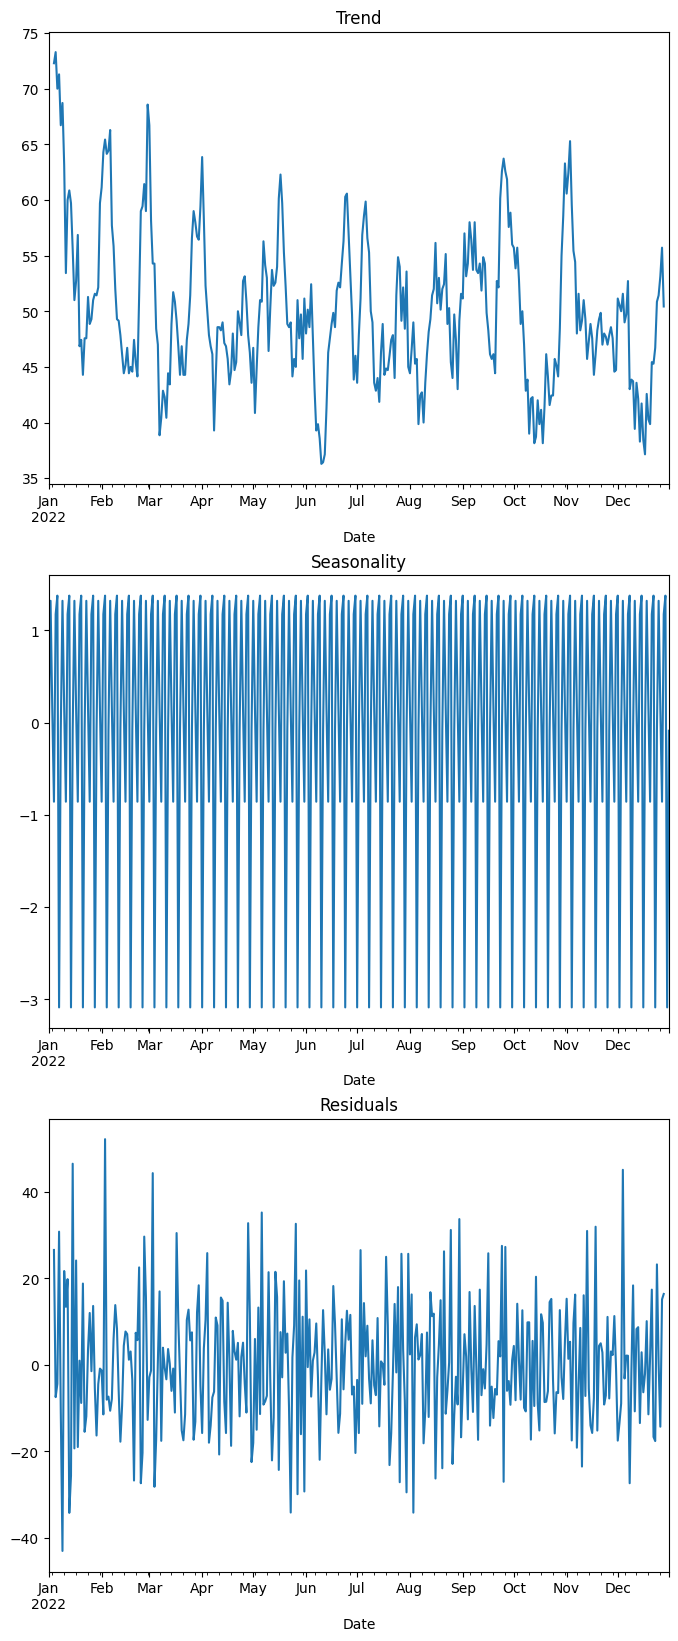

In [ ]:
#Mengambil TimeSeries untuk melakukan analisis dekomposisi

decomposed = seasonal_decompose (df_regresi.set_index('Date')) #disimpan divariabel decomposed
plt.figure(figsize=(8,20)) #membuat figure menampilkan hasil dekomposisi
plt.subplot(311) #Membuat 3 subplot
decomposed.trend.plot(ax=plt.gca()) #membuat plot dari komponen tren (trend) dari hasil dekomposisi.
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout #memastikan subplot yg dibuat tdk tumpang tindih sehingga mudah dibaca.

#Menampilkan 3 subplot dlm satu gambar yg masing" menunjukkan tren, musiman, dan residu dari time series yang dianalisis.
#Ini membantu memahami struktur data time series dan mencari tahu apakah ada tren atau musiman yang dapat digunakan dalam analisis lebih lanjut.

In [ ]:
#Membagi data time series menjadi dua set: satu set untuk pelatihan model (df_train)
#dan satu set untuk pengujian atau validasi model (df_test).

cut_off = round(df_regresi.shape[0] * 0.9) #Mengalikan jumlah entri dg 0.9 utk mendapatkan 90% dari data sbg data pelatihan.
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape #Memeriksa berapa byk data yg telah ditempatkan dlm set pelatihan dan pengujian.


((328, 2), (37, 2))

<Axes: xlabel='Date', ylabel='Qty'>

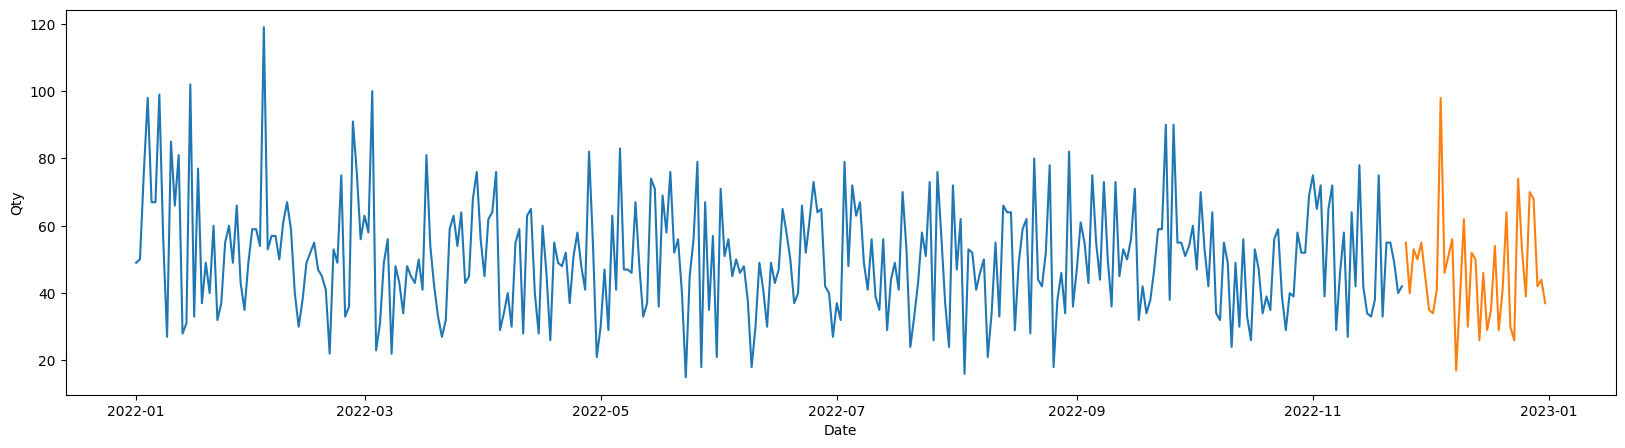

In [ ]:
#Membuat plot garis (line plot) dari data time series yg sdh dibagi menjadi dua set: data pelatihan (df_train) dan data pengujian (df_test).

plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty'])
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty'])

#Menampilkan Plot garis yg menggambarkan perubahan kuantitas ('Qty') dari waktu ke waktu berdasarkan tanggal ('Date') dalam data pelatihan.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

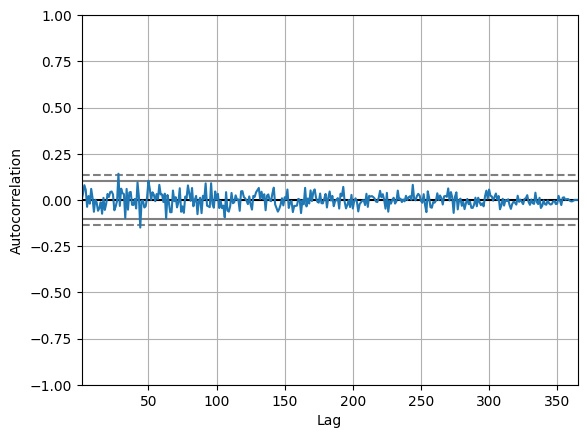

In [ ]:
#Membuat plot autocorrelation dari data time series yang ada dalam kolom 'Qty' dari DataFrame
autocorrelation_plot(df_regresi['Qty'])

#Untuk mendeteksi pola musiman dalam data dan membantu dalam pemilihan parameter untuk model ARIMA.

In [ ]:
#Mengukur performa model machine learning dg memberikan informasi ttg sejauh mana prediksi model mendekati nilai aktual,
#baik dari segi kesalahan rata-rata (MAE) maupun kesalahan berat (RMSE)

def rase(y_actual, y_pred):
  #Function untuk menghitung RMSE
  print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')

def eval (y_actual, y_pred):
  #Function untul eval machine learning modeling
  rase(y_actual, y_pred)
  print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

#Utk memahami kualitas prediksi model dan dapat digunakan untuk membandingkan performa model yang berbeda.

In [ ]:
#Membuat Model ML Clustering
merged_data.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
#Agregasi data dalam DataFrame merged_data berdasarkan kolom 'CustomerID'.
#mengelompokkan data pembelian berdasarkan pelanggan

cluster_data = merged_data.groupby(['CustomerID']).agg({'TransactionID':'count','Qty':'sum','TotalAmount':'sum'}).reset_index()


In [ ]:
cluster_data.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
cluster_data

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [ ]:
#Memproses data pelanggan yang telah diagregasi dicluster_data
data_cluster = cluster_data.drop(columns=['CustomerID'])
data_cluster_normalize = preprocessing.normalize(data_cluster)

#menghasilkan data_cluster_normalize

In [ ]:
#data_cluster_normalize, versi data yg telah dinormalisasi dan siap digunakan dalam algoritma clustering. Dengan normalisasi, dpt memastikan semua atribut
#memiliki kontribusi yang seimbang dalam proses clustering, tanpa dominasi dari atribut dengan skala nilai yang lebih besar.

data_cluster_normalize


array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [ ]:
#Menghitung nilai Silhouette Score untuk berbagai nilai K (jumlah cluster) yang berbeda dalam algoritma K-Means.
K = range(2,8) #Menginisialisasi kisaran nilai K yg akan dieksplorasi nilai K akan divariasi dari 2-7 cluster
fits = []
score = [] #Menyimpan model K-Means dan nilai Silhouette Score yang sesuai untuk setiap nilai K.
for k in K :
  model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_cluster_normalize)
  fits.append(model) #agar dapat mengakses model" tersebut nanti jika diperlukan.
  #menghitung Silhouette Score-nya. mengukur sejauh mana objek" dlm satu cluster mirip satu sama lain dan berbeda dari cluster lain
  score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

#fits berisi model K-Means utk setiap nilai K, dan score yang berisi nilai Silhouette Score yang sesuai.
#Ini akan membantu menentukan jumlah cluster yang optimal untuk data kita. Semakin tinggi nilai Silhouette Score, semakin baik performa clusteringnya.

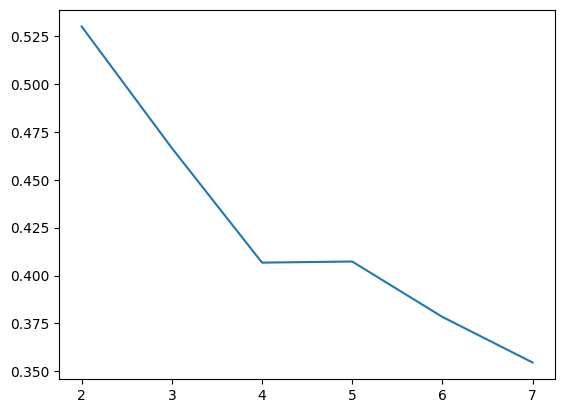

In [ ]:
#Memvisualisasikan nilai Silhouette Score yg dihasilkan oleh model K-Means dengan berbagai jumlah cluster yang berbeda (2-7 cluster)
sns.lineplot(x = K, y = score);

#Mencari titik di mana Silhouette Score mencapai nilai maksimum, karena itu akan menunjukkan bahwa cluster tersebut adalah yang terbaik untuk data.
#Dalam contoh ini, kita mencari jumlah cluster yang memberikan Silhouette Score tertinggi, yaitu 4 cluster.

In [ ]:
#Menambahkan kolom 'cluster_label' ke dlm DataFrame df_cluster yg berisi label kluster dr setiap data poin berdasarkan hasil clustering
df_cluster['cluster_label'] = fits[2].labels_

#Untuk melihat keanggotaan setiap data poin ke dalam kluster tertentu.

In [ ]:
#Melakukan aggregasi data dlm DataFrame df_cluster berdasarkan kolom 'cluster_label'.
df_cluster.groupby(['cluster_label']).agg({ #mengelompokkan data berdasarkan nilai unik dalam kolom 'cluster_label'
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty': 'mean', 'TotalAmount' : 'mean'
 })

#Hasilnya
#Ringkasan statistik yang mencakup jumlah pelanggan, rata-rata transaksi, rata-rata jumlah produk yang dibeli, dan rata-rata total belanja dalam setiap kluster.
#Hal ini membantu dlm memahami karakteristik dan perilaku pelanggan dlm masing-masing kluster.

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926
